In [1]:
from io import BytesIO
import numpy as np
from PIL import Image
import requests
import os

dir_ = "test_gallery"
if not os.path.exists(dir_):
    os.mkdir(dir_)

def get_img(url, num, dir_, choys=False):
    if choys:
        url = "http://storage.yandexcloud.net/choys-files-95a4e0626f4a/"+url
    path = f"{dir_}/{num}.png"
    Image.open(BytesIO(requests.get(url).content)).save(path)
    return path


def idx2url(indices, df):
    return df["path"].loc[indices].tolist()

In [2]:
from ImageRetrieval import ImageRetrieval
from dino import DINOv2
import pandas as pd


df = pd.read_csv("df_urls.csv")
ret = ImageRetrieval(DINOv2(head="head.ckpt", device="cpu"), [])
ret.load_embeddings("DINOv2_parsings.pt", n_components=-1, use_head=True)

In [3]:
url = "http://storage.yandexcloud.net/choys-files-95a4e0626f4a/choys_photo/cf3ae729-bece-4655-835f-74669640b2db_ShortsBelt_62_100.jpg"

path = get_img(url, "query", dir_)
confs, indices = ret.query([path], topk=5)
confs, indices

  0%|          | 0/1 [00:00<?, ?it/s]

(tensor([[1.0000, 0.9187, 0.8886, 0.8704, 0.8528]]),
 tensor([[ 700,  697,  696, 8915,  513]]))

In [4]:
urls = idx2url(indices[0], df)
urls

['choys_photo/cf3ae729-bece-4655-835f-74669640b2db_ShortsBelt_62_100.jpg',
 'choys_photo/a3712eb0-1978-4b29-903c-4917de1b0d34_ShortsBelt_102_100.jpg',
 'choys_photo/c59df614-879f-4c3d-87dc-5b848acae97b_ShortsBelt_103_100.jpg',
 'choys_photo/0c9f210a-02b1-4e99-96f5-028d2df3d7f3_7H33948X0.jpg',
 'choys_photo/600c1c9f-5bbd-4155-b5ba-5a032e34ba66_2421209076_102_100.jpg']

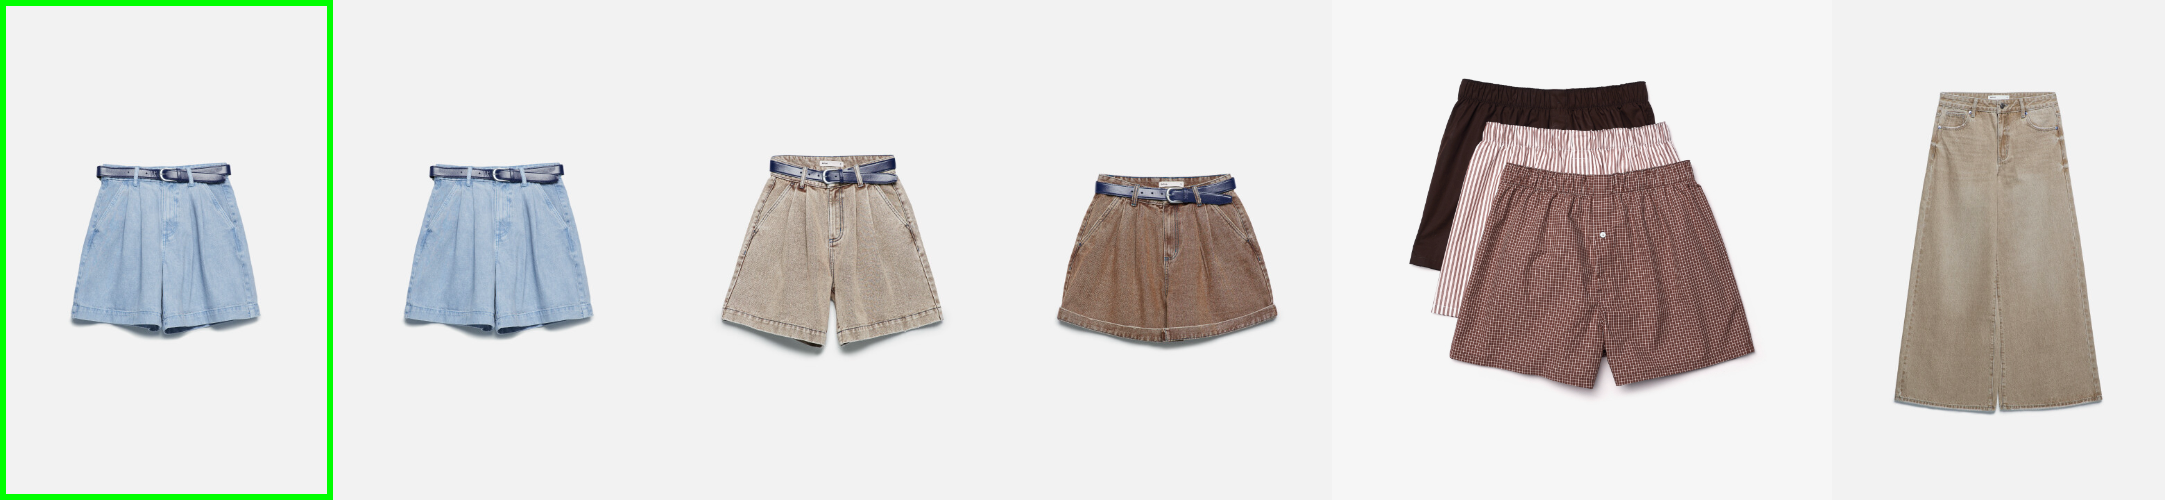

In [5]:
paths = [get_img(url, i, dir_, choys=True) for i, url in enumerate(urls)]
Image.fromarray(ret.draw(path, np.arange(len(paths)), paths))

## Test

In [ ]:
# from io import BytesIO
# from PIL import Image
# import requests
# import os
#
# dir_ = "test_gallery"
# if not os.path.exists(dir_):
#     os.mkdir(dir_)
#
# urls = ['choys_photo/cf3ae729-bece-4655-835f-74669640b2db_ShortsBelt_62_100.jpg',
#  'choys_photo/a3712eb0-1978-4b29-903c-4917de1b0d34_ShortsBelt_102_100.jpg',
#  'choys_photo/c59df614-879f-4c3d-87dc-5b848acae97b_ShortsBelt_103_100.jpg',
#  'choys_photo/0c9f210a-02b1-4e99-96f5-028d2df3d7f3_7H33948X0.jpg',
#  'choys_photo/600c1c9f-5bbd-4155-b5ba-5a032e34ba66_2421209076_102_100.jpg']
#
# def get_img(url, num):
#     url = "http://storage.yandexcloud.net/choys-files-95a4e0626f4a/"+url
#     return Image.open(BytesIO(requests.get(url).content)).save(f"{dir_}/{num}.png")
#
# _ = [get_img(url, i) for i, url in enumerate(urls)]

In [ ]:
# from ImageRetrieval import ImageRetrieval
# from dino import DINOv2
# import glob

# ret = ImageRetrieval(DINOv2(head="head.ckpt", device="cpu"), paths)
# ret.get_embeddings("embeddings.pt", batch_size=8, workers=0)

In [10]:
# ret.query([paths[0]], topk=5)

  0%|          | 0/1 [00:00<?, ?it/s]

torch.return_types.topk(
values=tensor([[1.0000, 0.9187, 0.8886, 0.8704, 0.8528]]),
indices=tensor([[0, 1, 2, 3, 4]]))